# This is anonymized version of live data of hotjar. I had to anonymized every data in PIA manner.

This is a 6 months data of Hotjar.
The original question we wanted to seek in this report was written down below.

- How many people visit the platform on average every week, every month?

- How much time do they spend on the platform?

- Which notebooks are the most popular and which are the least popular?

- Are users from the past cohort still returning to use the platform?

- Can we figure out which user from the last cohort has not used the platform at 
all? 

In [1]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
#ignore warnings and show every columns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [3]:
#import 6 monthes of recording data of Hotjar.
hot= pd.read_csv('Hotjar_6month.csv')

In [69]:
hot.head().style.hide_columns(['Landing Page URL','Exit Page URL','Recording URL','Hotjar User ID','Referrer URL'])

,Publicly Shared,Already Watched,Comments,Labels,Created,New / Returning,Country,Action Count,Page Count,Duration (seconds),Device,Device Screen Size,Browser,Operating System,Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Events
0,False,False,nan,nan,2021-10-14T00:13:02,Returning user,US,6,3,110,Desktop,1920 X 969,Chrome,Windows,Only available on Hotjar Business,Only available on Hotjar Business,nan,nan,nan
1,False,False,nan,nan,2021-10-16T17:45:07,Returning user,US,102,3,1390,Desktop,2048 X 1010,Chrome,Windows,Only available on Hotjar Business,Only available on Hotjar Business,nan,nan,nan
2,False,False,nan,nan,2021-10-18T00:08:41,New user,US,61,7,649,Desktop,989 X 449,Edge,Windows,Only available on Hotjar Business,Only available on Hotjar Business,nan,nan,nan
3,False,False,nan,nan,2021-10-18T00:14:34,New user,US,3,2,22,Desktop,1237 X 562,Edge,Windows,Only available on Hotjar Business,Only available on Hotjar Business,nan,nan,nan
4,False,False,nan,nan,2021-10-19T00:12:02,New user,PK,4,3,41,Desktop,1366 X 665,Edge,Windows,Only available on Hotjar Business,Only available on Hotjar Business,nan,nan,nan


In [5]:
hot.describe()

,Comments,Labels,Action Count,Page Count,Duration (seconds),Net Promoter Score®,Events
count,0.0,0.0,547.000000,547.000000,547.000000,0.0,0.0
mean,NaN,NaN,71.760512,6.219378,2172.943327,NaN,NaN
std,NaN,NaN,135.864021,7.682776,2575.849260,NaN,NaN
min,NaN,NaN,2.000000,1.000000,2.000000,NaN,NaN
25%,NaN,NaN,6.000000,3.000000,278.000000,NaN,NaN
50%,NaN,NaN,19.000000,4.000000,1225.000000,NaN,NaN
75%,NaN,NaN,71.000000,7.000000,3193.500000,NaN,NaN
max,NaN,NaN,990.000000,84.000000,14725.000000,NaN,NaN


# Preprocessing

In [70]:
#dropping unnecessary columns or columns that have no data.
hot_drop=hot.drop(['Publicly Shared','Already Watched','Comments','Labels','Events','Net Promoter Score®','Incoming Feedback','Rage Clicked','U-Turned','Referrer URL'],axis=1)
hot_referrer = hot[['Referrer URL']].dropna()
hot_feedback = hot[['Incoming Feedback']].dropna()
ht=hot_drop

ht.head().style.hide_columns(['Landing Page URL','Exit Page URL','Recording URL','Hotjar User ID','Created'])

,New / Returning,Country,Action Count,Page Count,Duration (seconds),Device,Device Screen Size,Browser,Operating System
0,Returning user,US,6,3,110,Desktop,1920 X 969,Chrome,Windows
1,Returning user,US,102,3,1390,Desktop,2048 X 1010,Chrome,Windows
2,New user,US,61,7,649,Desktop,989 X 449,Edge,Windows
3,New user,US,3,2,22,Desktop,1237 X 562,Edge,Windows
4,New user,PK,4,3,41,Desktop,1366 X 665,Edge,Windows


In [7]:
#Find username fron it's URL address
import re

exit= ht['Exit Page URL']
exit_ind = exit.index
user=[]
i=0

for Username in exit:
    Username=re.findall('user/(.*)/notebooks',Username)


    user.append(Username)


user_f=pd.DataFrame(data=user)
user_f=user_f.rename({0: "Username"},axis='columns')

In [8]:
#find Username in Landing URL
land= ht['Landing Page URL']

user_land=[]


for Username in land:
    Username=re.findall('spawn-pending/(.*)\?next' or 'user/(.*)\/',Username)

    user_land.append(Username)


user_landf=pd.DataFrame(data=user_land)
user_landf=user_landf.rename({0: "Username"},axis='columns')

In [9]:
#fill na value in user_f with landing page username data.
user_final= user_f['Username'].fillna(user_landf['Username'])
user_final=user_final.fillna("Noname")

In [10]:
#splitting Notebook name from the URL
note=[]
i=0

for Note in exit:
    Note=Note.split('/')[-1]
    Note=Note.split('%')[-1]

    note.append(Note)


note_f=pd.DataFrame(data=note)
note_f=note_f.rename({0: "Notebook"},axis='columns')

In [11]:
#Extrating landing page's notebook information.

note_land=[]

for Notel in land:
    Notel=Notel.split('/')[-1]
    Notel=Notel.split('%')[-1]

    note_land.append(Notel)


note_landf=pd.DataFrame(data=note_land)
note_landf=note_landf.rename({0: "Notebook(landing)"},axis='columns')

In [12]:
#fill na value in note_f with landing page notebook data
note_final= note_f['Notebook'].fillna(note_landf['Notebook(landing)'])

In [13]:
#append username data in to dataframe
ht['Username']=user_final

In [14]:
#find that username is null.
user_na = user_final.loc[user_final == "Noname"]

In [15]:
#Removing time information to have a date that the data created
created=[]


for cr in ht['Created']:
    cr=cr.split('T')[0]


    created.append(cr)
    



date=pd.DataFrame(data=created)
date=date.rename({0: "Date"},axis='columns')
date=pd.to_datetime(date['Date'])
Date=pd.DataFrame(data=date)

In [16]:
#extrating month data
month=[]


for mt in ht['Created']:
    mt=mt.split('-')[1]


    month.append(mt)
    



Month=pd.DataFrame(data=month)
Month=Month.rename({0: "Created Month"},axis='columns')

In [17]:
#creating week date from date data.
#wk=(date.day-1 + (date.dayofweek()-date.day+1)%7) // 7 + 1)
tm=Date.Date.dt.month
td=Date.Date.dt.day
tmn=Date.Date.dt.month_name().str[:3]
week=[]
for x in td:
    wk=((int(x)//7)+1)

    week.append(wk)
Week=pd.DataFrame(data=week)
Week=Week.rename({0: "Week"},axis='columns')
Week['Month']=tm
Week['Month Name']=tmn
Week['Created Week']=Week.agg(lambda x: f"{x['Month Name']}-{x['Week']}th",axis=1)

In [18]:
#Add columns that we extrated from proprocessing
ht['Created Date']=Date
ht['Created Year']=pd.DatetimeIndex(ht['Created Date']).year
ht['Created Month']=Month
ht['Created Week']=Week['Created Week']
ht['Week Number']=Week['Week']
ht['Notebook']=note_final


In [19]:
#transforming duration by seconds to other min/hour form.
ht['Duration(hour)']=(ht['Duration (seconds)'] / 3600)
ht['Duration(min)']=(ht['Duration (seconds)'] / 60)

In [20]:
ht_namegr=ht.groupby(['Username'])

In [21]:
#checking up is there any more null data.
ht.isnull().sum()

Recording URL         0
Created               0
New / Returning       0
Hotjar User ID        0
Country               0
Action Count          0
Page Count            0
Duration (seconds)    0
Device                0
Device Screen Size    0
Browser               0
Operating System      0
Landing Page URL      0
Exit Page URL         0
Username              0
Created Date          0
Created Year          0
Created Month         0
Created Week          0
Week Number           0
Notebook              0
Duration(hour)        0
Duration(min)         0
dtype: int64

In [22]:
#checking up any duplicated data
ht.duplicated().value_counts()

False    547
dtype: int64

In [23]:
#import emplyee username data
emp = pd.read_csv('Employee JupyterHub usernames.csv')

In [24]:
#read cohort student information.
co=pd.read_csv('student_profile_info_2022-01-10-1712.csv')
co_drop=co.drop(['id','email','language','location','year_of_birth','gender','level_of_education','mailing_address','goals','enrollment_mode','verification_status','city','country'],axis=1)

co_name=co_drop['username']
co_drop=co_drop.rename({"username": "Username"},axis='columns')

co_drno=co_drop.loc[co_drop['cohort'] != ('Default Group' or 'Corporate_Opportunities' or 'employee' or 'Part-time Instructors')].copy()
co_drno=co_drno[~co_drno['cohort'].str.contains('employee','Part-time Instructors')]

In [25]:
emp['name']=emp['Username']
emp['cohort']='employee'
pp=pd.concat([emp, co_drop], ignore_index=True)
pp=pp.drop_duplicates(subset=['Username', 'name'], keep='last')
htp=pd.merge(ht,pp,on="Username")

# anonymising Personal information in with faker package

In [26]:
#anonymizing personal name and username
import faker as faker
from faker import Faker
faker = Faker(['it_IT', 'de_DE', 'sv_SE'])

dict_names = {name: faker.name() for name in htp['name'].unique()}
dict_names2 = {user: faker.name() for user in htp['Username'].unique()}
htp['name2'] = htp['name'].map(dict_names)
htp['Username2']= htp['Username'].map(dict_names2)
ht=htp

In [27]:
#anonymizing notebook data name.
dict_names3 = {name: faker.catch_phrase() for name in ht['Notebook'].unique()}
ht['FakeNotebook']=ht['Notebook'].map(dict_names3)
note_sumz=ht['FakeNotebook'].value_counts(sort=True)


note_sumzz=pd.DataFrame(data=note_sumz)
note_sumzz=note_sumzz.reset_index()
note_sumzz=note_sumzz.rename(columns={'FakeNotebook':'Counts' , 'index':'Fakenotebook'})
note_small=note_sumzz.loc[note_sumzz['Counts'] ==2]
note_big = note_sumzz.nlargest(20,'Counts')

In [28]:
#Seperating rows that is related with employee's account.

ht_xna=ht.loc[ht['Username'] != "Noname"].copy()
ht_emp=ht.loc[ht['Username'].isin(emp['Username'])].copy()
ht_noemp=ht.loc[~ht['Username'].isin(emp['Username'])].copy()
ht_clean=ht_noemp.loc[ht_noemp['Username'] != "Noname"].copy()

In [29]:
co_noemp=ht.loc[ht['cohort'] != ('Default Group' or 'Corporate_Opportunities' or 'employee' or 'Part-time Instructors')].copy()
co_noemp=co_noemp[~co_noemp['cohort'].str.contains('employee','Part-time Instructors')]

In [30]:
#separate current cohort students from other
cur_st=ht.loc[ht['cohort'] == "online_winter_2022"]
past_st=ht.loc[ht['cohort'] != "online_winter_2022"]

In [31]:
cur_stgr=cur_st.groupby('name2').count()

In [32]:
#build function to check if username is one to one with Hotjar User id
ht_xna['one-to-one UserID to Username']=ht_xna.groupby('Username2')['Hotjar User ID'].transform(lambda x:x.nunique()==1)
ht_xna['one-to-one UserID to Username'].value_counts()

True     220
False    115
Name: one-to-one UserID to Username, dtype: int64

In [33]:
#How much time do they spend on the platform by everyone?
user_ht = ht.groupby('Username2')
user_sum = user_ht.sum()


In [34]:
#How much time do they spend on the platform by employee?
user_empht = ht_emp.groupby('Username2')
user_empsum = user_empht.sum()


In [71]:
user_clean=ht_clean.groupby('Username2')
user_cleansum=user_clean.sum()

In [36]:
User_sum=user_sum.iloc[:,5].copy()
User_sum=pd.DataFrame(data=User_sum)

User_empsum=user_empsum.iloc[:,5].copy()
User_empsum=pd.DataFrame(data=User_empsum)

User_cleansum=user_cleansum.iloc[:,5].copy()
User_cleansum=pd.DataFrame(data=User_cleansum)

# (Visualization) 6 Months of Hotjar Recording

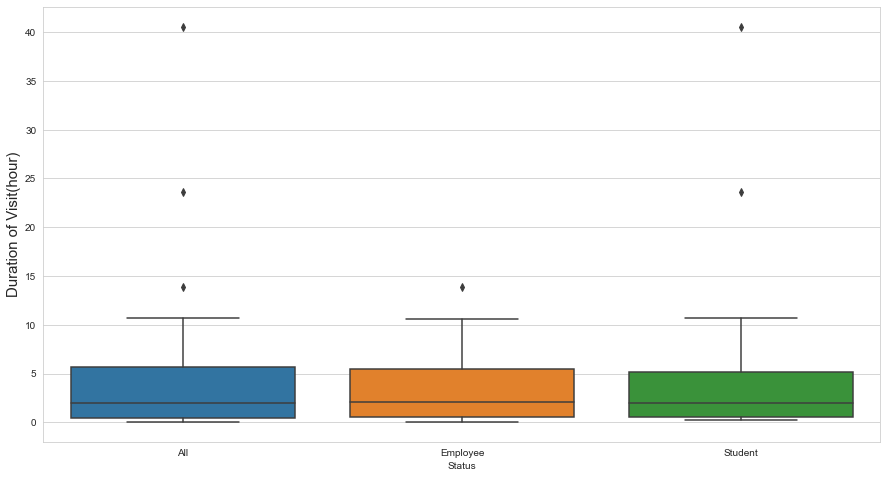

In [37]:
User_sum=User_sum.assign(Status='All')
User_empsum=User_empsum.assign(Status='Employee')
User_cleansum=User_cleansum.assign(Status='Student')

cdf = pd.concat([User_sum, User_empsum, User_cleansum]) 
mdf = pd.melt(cdf, id_vars=['Status'], var_name=['By Hours'])

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Status", y="value", data=mdf)   
ax.set_ylabel('Duration of Visit(hour)',fontsize = 15)
plt.show()

In [38]:
#How many people visit website every month.
user_sumhr = user_sum['Duration(hour)']
user_sumhr=pd.DataFrame(data=user_sumhr)
user_sumhr=user_sumhr.sort_values(by='Duration(hour)',ascending=False)
user_sumhr

,Duration(hour)
Username2,
Carla Santi,40.568889
Leif Gustavsson,23.568333
Dott. Alberto Antonello,13.916667
Arne Jansson,10.651389
Ing. Irmtraud Jungfer B.Sc.,10.629444
Klaus-Dieter Rust,8.335278
Erik Sandberg,8.287222
Dipl.-Ing. Clemens Seidel,7.702778
Tomas Olsson,5.888333


In [39]:
#Students from current & previous cohort who never visited 
stu=cur_st.append(past_st)
stu_no=co_drno[~(co_drno.name.isin(stu.name))] 
stu_no['Username']=stu_no['Username'].str.lower()

In [40]:
#Anonymizing Students from current & previous cohort who never visited 
from anonymizedf.anonymizedf import anonymize
an = anonymize(stu_no)

stfk= (an
      .fake_ids('Username', chaining=True)
      .fake_names('name', chaining=True)
      .show_data_frame())
stfk=stfk.rename({"Fake_Username": "Generated Username","Fake_name":"Generated name"},axis='columns')
stfk.head.style.hide_columns(['Username','name'])

,cohort,Generated Username,Generated name
0,online_june_2020,RDAY00839295813741,Philip Miah-Lowe
2,online_april_2020,UNYD02529193907589,Dr Marc Porter
3,online_june_2020,PCOH99233205362448,Conor Edwards
4,online_summer_2021,VGKH50046085365490,Mrs Bethany Donnelly
5,online_fall_2020,FUEJ39018948469551,Kyle Ward
6,online_fall_2020,MVJB34763254422901,Molly Parker
7,online_fall_2021,SNJR21719834719846,Leonard Morgan
8,online_winter_2021,CWWU72562966774691,Glen Harris
9,online_summer_2020,OTVW57123829229448,Daniel Walker
10,online_june_2020,XXKL45286412570735,Conor Edwards


In [51]:
#students who are in current cohort who never visited Notebook (5 people out of 24)
stu_nocr=stu_no.loc[stu_no['cohort']== 'online_winter_2022']
stu_nocr=stu_nocr.rename({"Fake_Username": "Generated Username","Fake_name":"Generated name"},axis='columns')
stu_nocr.style.hide_columns(['Username','name'])

,cohort,Generated Username,Generated name
17,online_winter_2022,AJRF91316935483686,Carole Woods
62,online_winter_2022,UNTS97296086419962,Melanie Thomson
112,online_winter_2022,VTQO92839399340591,Dr Dorothy Barlow
140,online_winter_2022,WRIY94265729269826,Clare Arnold
142,online_winter_2022,DIPI00137260027438,Alexandra Robertson
153,online_winter_2022,LDMU18755679161023,Vincent Brown
156,online_winter_2022,AMTI98272914116497,Christine Richardson-Moore
157,online_winter_2022,MFFU70291809154792,Damien Hughes
162,online_winter_2022,QLVI89057570127865,Leanne Martin
183,online_winter_2022,BSLG89439689265554,Dr Lewis Byrne


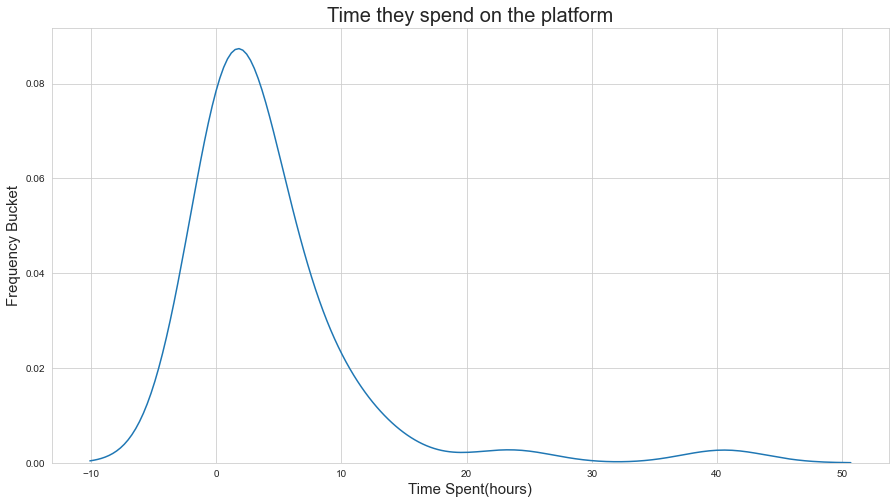

In [42]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data=user_sum, x="Duration(hour)")
ax.set_xlabel('Time Spent(hours)',fontsize = 15)
ax.set_ylabel('Frequency Bucket',fontsize = 15)
ax.set_title('Time they spend on the platform',fontsize = 20)
plt.show()

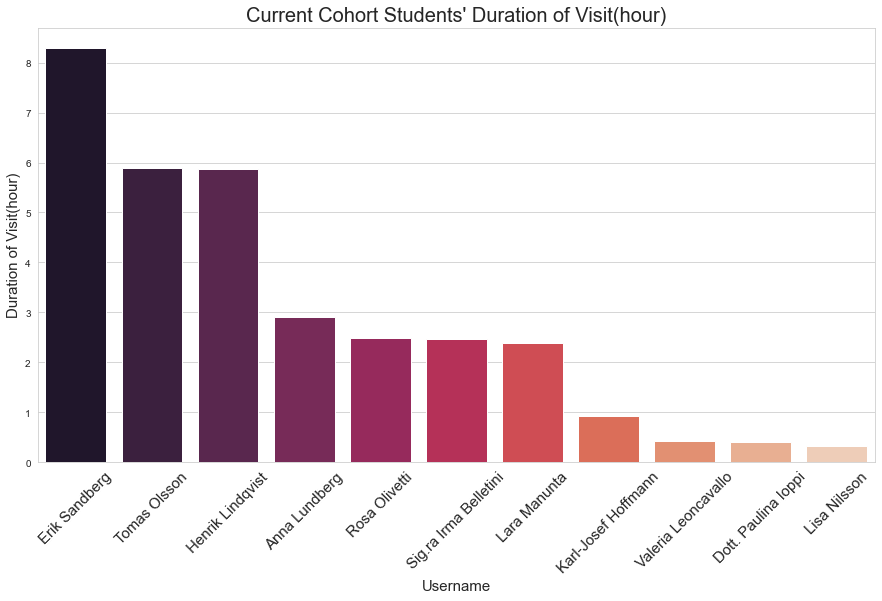

In [43]:
#current student table of hour sum.
cur_stsum=cur_st.groupby(['Username2']).sum()

plt.figure(figsize=(15,8))
ax = sns.barplot(x=cur_stsum.index,y=cur_stsum['Duration(hour)'],palette="rocket",order=cur_stsum.sort_values('Duration(hour)',ascending=False).index)
ax.set_xlabel('Username',fontsize = 15)
plt.xticks(rotation=45, fontsize= 15)
ax.set_ylabel('Duration of Visit(hour)',fontsize = 15)
ax.set_title("Current Cohort Students' Duration of Visit(hour)",fontsize = 20)
plt.show()

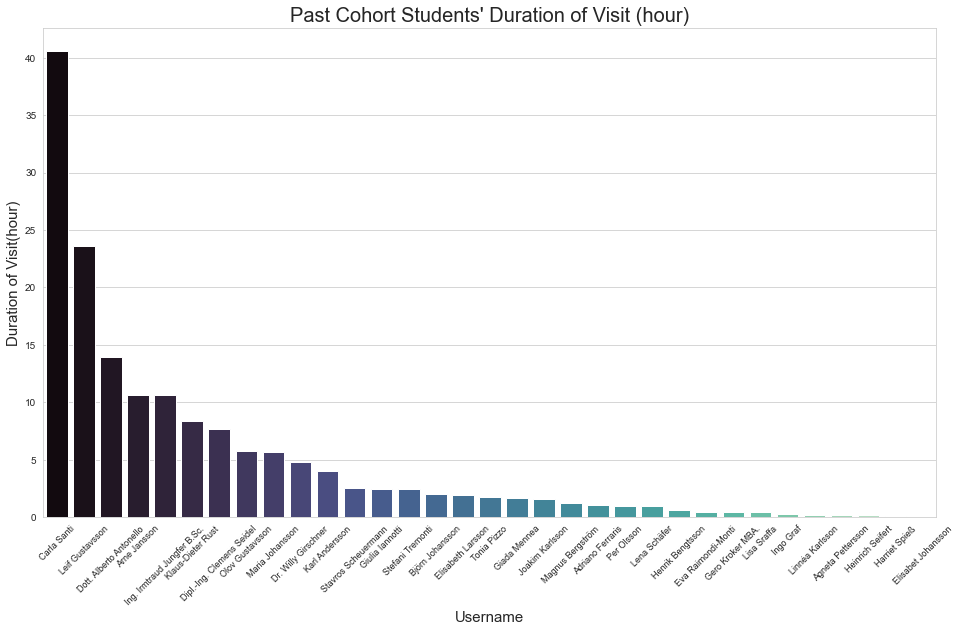

In [44]:
past_stsum=past_st.groupby(['Username2']).sum()

plt.figure(figsize=(16,9))
ax = sns.barplot(x=past_stsum.index,y=past_stsum['Duration(hour)'],palette="mako",order=past_stsum.sort_values('Duration(hour)',ascending=False).index)
ax.set_xlabel('Username',fontsize = 15)
plt.xticks(rotation=45, fontsize= 9)
ax.set_ylabel('Duration of Visit(hour)',fontsize = 15)
ax.set_title("Past Cohort Students' Duration of Visit (hour)",fontsize = 20)
plt.show()

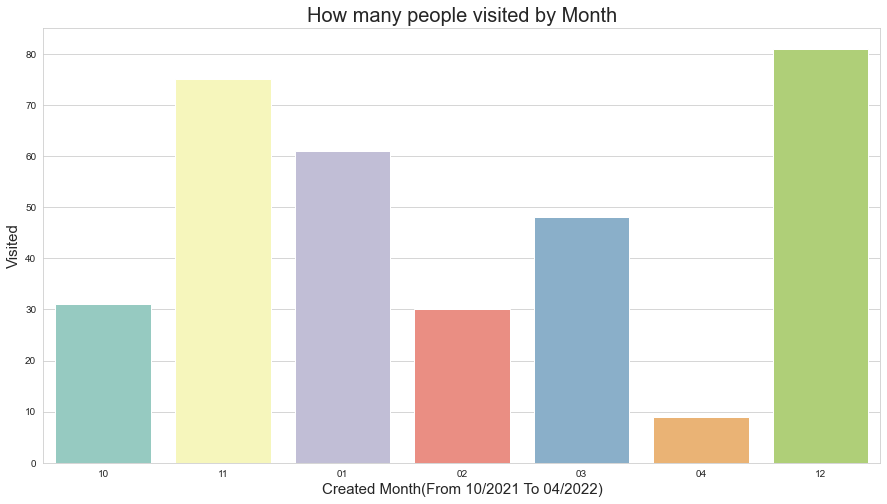

In [67]:
#How many visited website every month.
ht_mtcount = ht.groupby(['Created Month']).count()
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Created Month', data=ht,palette="Set3")
ax.set_xlabel('Created Month(From 10/2021 To 04/2022)',fontsize = 15)
ax.set_ylabel('Visited',fontsize = 15)
ax.set_title('How many people visited by Month',fontsize = 20)
plt.show()

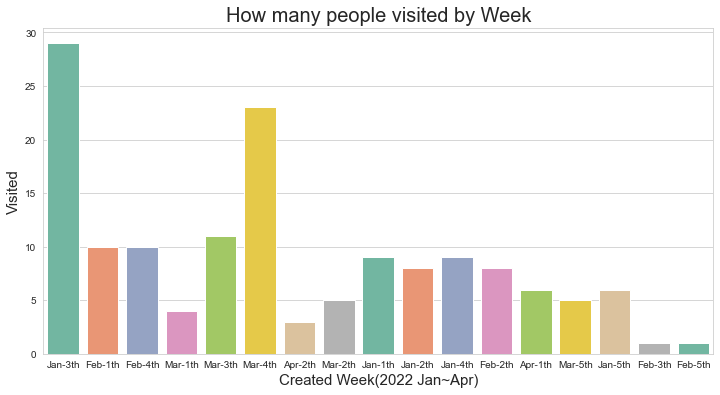

In [65]:
# How many people visit website every week.


ht_22mon = ht.loc[ht['Created Year']==2022]
ht_21mon = ht.loc[ht['Created Year']==2021]
plt.figure(figsize=(12,6))

ax = sns.countplot(x='Created Week', data=ht_22mon,palette="Set2")
ax.set_xlabel('Created Week(2022 Jan~Apr)',fontsize = 15)
ax.set_ylabel('Visited',fontsize = 15)
ax.set_title('How many people visited by Week',fontsize = 20)
plt.show()

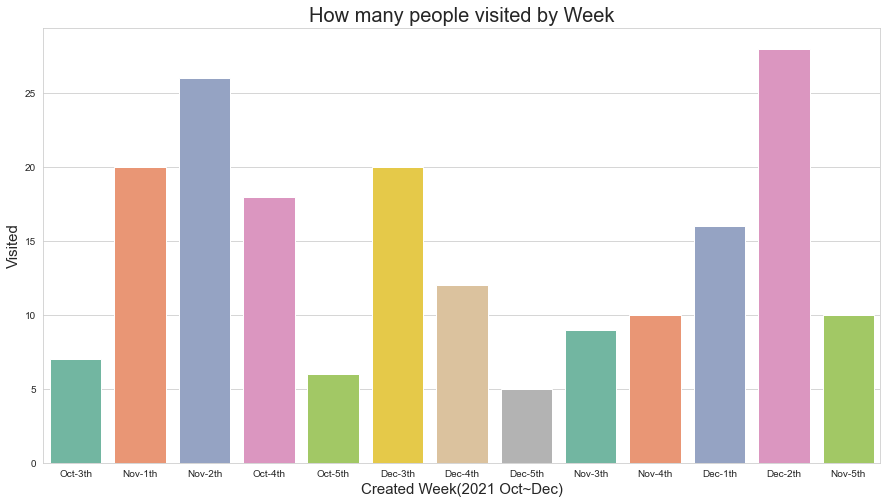

In [47]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Created Week', data=ht_21mon,palette="Set2")
ax.set_xlabel('Created Week(2021 Oct~Dec)',fontsize = 15)
ax.set_ylabel('Visited',fontsize = 15)
ax.set_title('How many people visited by Week',fontsize = 20)
plt.show()

In [48]:
#smallest visited Notebook (all 70)


note_small

,Fakenotebook,Counts
39,Balanced demand-driven installation,2
40,Mandatory systematic function,2
41,Adaptive tangible emulation,2
42,Interfaccia monitorata asimmetrica,2
43,Business-focused fault-tolerant standardization,2
44,Interfaccia sincronizzata full-range,2
45,Face-to-face discrete superstructure,2
46,User-friendly directional migration,2
47,Circuito bilanciata euristica,2
48,Configurable value-added benchmark,2


In [49]:
#largest visited Notebook. (Day1 homework)
note_big

,Fakenotebook,Counts
0,Definizione proattiva basta sul contesto,37
1,Managed directional standardization,28
2,Synergistic regional pricing structure,16
3,Standardizzazione ricontestualizzata valore aggiunto,10
4,Versatile global extranet,10
5,Iniziativa adattiva asincrona,8
6,Innovative scalable ability,8
7,Pre-emptive even-keeled hierarchy,7
8,Synergized content-based throughput,7
9,Configurable web-enabled website,7


In [50]:
#total feedback from users.
hot_feedback

,Incoming Feedback
112,Dislike
415,Hate
